In [6]:
import sys

#sys.path.append('/home/mashjunior/anaconda3/envs/james_tensor')

In [11]:
#!conda install --channel https://conda.anaconda.org/menpo opencv3

/ 

In [12]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [13]:
#from google.colab import drive


#if os.path.exists('/content/drive')==False:
#    drive.mount('/content/drive')
#    print('Google Drive is mounted\n')
#else:
#    print('Google Drive is already mounted\n')

In [14]:
train_path="/home/mashjunior/loTeNet_pytorch/Covid-19_images/COVID-19_Radiography/COVID-19 Radiography Database/train"
# test_path="/content/drive/My Drive/Colab Notebooks/CXR_Covid-19_Challenge/test"
val_path="/home/mashjunior/loTeNet_pytorch/Covid-19_images/COVID-19_Radiography/COVID-19 Radiography Database/valid"

In [15]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [16]:
# x_test=[]

# for folder in os.listdir(test_path):

#     sub_path=test_path+"/"+folder

#     for img in os.listdir(sub_path):

#         image_path=sub_path+"/"+img

#         img_arr=cv2.imread(image_path)

#         img_arr=cv2.resize(img_arr,(224,224))

#         x_test.append(img_arr)

In [17]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [18]:
train_x=np.array(x_train)
# test_x=np.array(x_test)
val_x=np.array(x_val)

In [19]:
train_x=train_x/255.0
# test_x=test_x/255.0
val_x=val_x/255.0

In [20]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/home/mashjunior/anaconda3/envs/james_tensor/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mashjunior/anaconda3/envs/james_tensor/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mashjunior/anaconda3/envs/james_tensor/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mashjunior

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255)
# test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
# test_set = test_datagen.flow_from_directory(test_path,
#                                             target_size = (224, 224),
#                                             batch_size = 32,
#                                             class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1800 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [23]:
train_y=training_set.classes
# test_y=test_set.classes
val_y=val_set.classes

In [24]:
#train_y.shape,test_y.shape,val_y.shape
train_y.shape,val_y.shape

((1800,), (1200,))

In [26]:
from __future__ import print_function

import numpy as np
from random import shuffle
import time
import csv
from PIL import Image
import os
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from keras.utils import np_utils
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras import callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm

Using TensorFlow backend.


In [27]:
# for reproducibility
np.random.seed(3768)

# use this environment flag to change which GPU to use 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # specify which GPU(s) to be used

#Get TensorFlow session
def get_session():
    config = tf.ConfigProto() 
    config.gpu_options.allow_growth = True 
    return tf.Session(config=config) 
  
# One hot encoding of labels 
def dense_to_one_hot(labels_dense,num_clases=3):
    return np.eye(num_clases)[labels_dense]

In [28]:
train_y = dense_to_one_hot(train_y,num_clases=3)
val_y= dense_to_one_hot(val_y,num_clases=3)

In [29]:
#Image data generation for the training 
datagen = ImageDataGenerator(
               featurewise_center = False, 
               samplewise_center = False,  # set each sample mean to 0
               featurewise_std_normalization = True,  
               samplewise_std_normalization = False)  

datagen.fit(train_x) 
# for i in range(len(test_x)):
#       test_x[i] = datagen.standardize(test_x[i])

/home/mashjunior/anaconda3/envs/james_tensor/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [30]:
train_x.shape

(1800, 224, 224, 3)

# Model

In [31]:
from __future__ import absolute_import

from __future__ import division

from __future__ import print_function

import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import *
from tensorflow.keras.layers import *


In [32]:
def VGG19(input_shape=None,classes=3, use_soft=True):


    img_input = layers.Input(shape=input_shape)


    # Block 1

    x = layers.Conv2D(2, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block1_conv1',kernel_initializer="he_normal")(img_input)

    x = layers.Conv2D(2, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block1_conv2',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)



    # Block 2

    x = layers.Conv2D(4, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block2_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(4, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block2_conv2',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)



    # Block 3

    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv2',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv3',kernel_initializer="he_normal")(x)
    x = layers.Conv2D(8, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block3_conv4',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)



    # Block 4

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block4_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block4_conv2',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3,3),

                      activation='relu',

                      padding='same',

                      name='block4_conv3',kernel_initializer="he_normal")(x)
    x = layers.Conv2D(16, (3,3),

                      activation='relu',

                      padding='same',

                      name='block4_conv4',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)



    # Block 5

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv1',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv2',kernel_initializer="he_normal")(x)

    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv3',kernel_initializer="he_normal")(x)
    x = layers.Conv2D(16, (3, 3),

                      activation='relu',

                      padding='same',

                      name='block5_conv4',kernel_initializer="he_normal")(x)

    x = layers.MaxPooling2D((2, 2), strides=(2,2), name='block5_pool')(x)


        # Classification block

    x = layers.Flatten(name='flatten')(x)

    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x=layers.Dropout(0.5)(x)

    x = layers.Dense(128, activation='relu', name='fc2')(x)
    #x=layers.Dropout(0.8)(x)

    if use_soft:
        x = Dense(classes, activation = "softmax", name='predictions')(x)
    else:
        x = Dense(classes, activation = "linear", name = "Z_4")(x)

    model = models.Model(img_input, x, name='vgg19')
    model.summary()

    return model



In [33]:
from tensorflow.keras.models import Sequential
tf.compat.v1.get_default_graph()

In [34]:
#Defining hyperparameters
batch_Size = 32
steps_Per_Epoch = 32
numEpochs = 50

#Instantating VGG19 model
model = VGG19((224,224,3),3) #VGG19_dense for revised VGG19, VGG19 for VGG19. Please pay attention to VGG16(), chnage the input shape and class number in VGG.py.

#Creating an optimizers
adaDelta = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
model.compile(optimizer = sgd , loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Creating early stopping 
earlystop = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 50, verbose = 1, mode = 'auto', restore_best_weights = True)       

train_generator = datagen.flow(train_x, train_y, batch_size = batch_Size)
validation_generator = datagen.flow(val_x, val_y, batch_size = batch_Size)

# Model training
history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_Per_Epoch,
    validation_data = validation_generator, 
    validation_steps = 5,
    epochs = numEpochs,
    shuffle = True, 
    verbose = 1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________

32/32 [==============================] - 9s 276ms/step - loss: 0.2198 - acc: 0.9320 - val_loss: 0.3943 - val_acc: 0.8500
Epoch 31/50
32/32 [==============================] - 9s 289ms/step - loss: 0.2594 - acc: 0.9150 - val_loss: 0.3222 - val_acc: 0.8875
Epoch 32/50
32/32 [==============================] - 9s 286ms/step - loss: 0.2686 - acc: 0.9040 - val_loss: 0.4706 - val_acc: 0.8875
Epoch 33/50
32/32 [==============================] - 9s 276ms/step - loss: 0.2103 - acc: 0.9310 - val_loss: 0.5221 - val_acc: 0.8625
Epoch 34/50
32/32 [==============================] - 9s 282ms/step - loss: 0.3066 - acc: 0.8916 - val_loss: 0.2910 - val_acc: 0.9000
Epoch 35/50
32/32 [==============================] - 9s 274ms/step - loss: 0.2427 - acc: 0.9090 - val_loss: 0.3013 - val_acc: 0.9125
Epoch 36/50
32/32 [==============================] - 9s 280ms/step - loss: 0.2014 - acc: 0.9268 - val_loss: 0.3585 - val_acc: 0.9000
Epoch 37/50
32/32 [==============================] - 9s 286ms/step - loss: 0.2198

In [35]:
modelPath = "VGG19_COVID19.h5"
resultPath = 'VGG19_COVID19.txt'

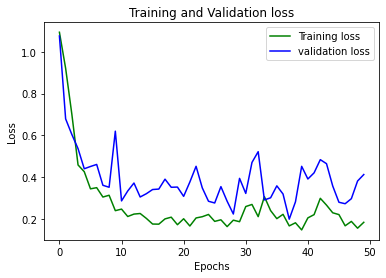

In [44]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

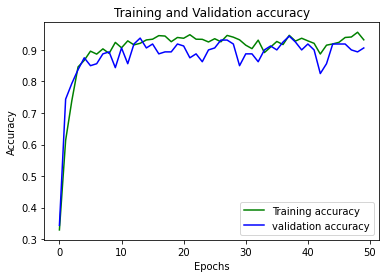

In [47]:
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# End here - we don't have the test data yet

In [48]:
y_test_oh = dense_to_one_hot(test_y, num_clases=3)
# Model evaluation 
score, acc = model.evaluate(test_x, y_test_oh, batch_size=batch_Size)
print("Accuracy:", acc)

#if acc>0.675:
model.save_weights(modelPath)

NameError: name 'test_y' is not defined

In [49]:
y_pred = model.predict(test_x)
y_pred = y_pred.reshape(len(test_y), 3)
y_pred = np.argmax(y_pred, axis=1)

# Writing results on file
f = open(resultPath,'a') #create classification report
f.write(classification_report(test_y, y_pred))
f.write(str(sklm.cohen_kappa_score(test_y, y_pred))+","+str(acc)+","+str(score)+"\n")

#Print class-wise classification metrics
print(classification_report(test_y, y_pred))

NameError: name 'test_x' is not defined

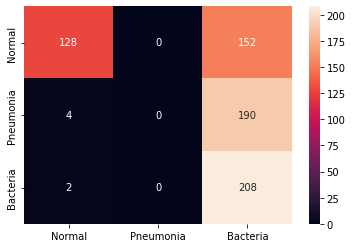

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(cm,annot=True,fmt='g',xticklabels=['Normal',"Pneumonia","Bacteria"],yticklabels=['Normal',"Pneumonia","Bacteria"])

# Explainability - Grad-CAM and Grad-CAM++

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,10

from scipy.ndimage.interpolation import zoom
#import VGG
#import gradcamutils
import numpy as np
import os
from PIL import Image
#import innvestigate

#from VGG import *

In [ ]:
# use this environment flag to change which GPU to use 
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # specify which GPU(s) to be used

In [ ]:
def createOrRestoreModel(): 
    vggModel = VGG19((224,224,3),3, False) #set up model architecture

    vggModel.summary()
    vggModel.load_weights("VGG19_COVID19.h5") #load weights

    model = vggModel

    return model

In [ ]:
def readTestImage(img_path): 
    img = Image.open(img_path) #open image you want to visualize "1238_R.png"

    img = np.array(img.resize((224,224), Image.ANTIALIAS))
    imgArr = img.reshape(1,224,224,3)#open image you want to visualize
    imgNormalized = imgArr / 255.
    
    return img, imgArr, imgNormalized

In [ ]:
img_path="/content/drive/My Drive/Colab Notebooks/Imaging/Example_images/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg"
img, imgArr, imgNormalized = readTestImage(img_path)

In [ ]:
model = createOrRestoreModel()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 2)       56        
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 2)       38        
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 2)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 4)       76        
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 4)       148       
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 4)         0     

In [ ]:
from scipy.ndimage.interpolation import zoom
import numpy as np
from tensorflow.keras import backend as K
from keras.preprocessing.image import load_img, img_to_array

import matplotlib.pyplot as plt

def grad_cam(input_model, image, layer_name,H=360,W=360):
    cls = np.argmax(input_model.predict(image))
    print(cls)
    def normalize(x):
        """Utility function to normalize a tensor by its L2 norm"""
        return (x + 1e-10) / (K.sqrt(K.mean(K.square(x))) + 1e-10)
    """GradCAM method for visualizing input saliency."""
  
    y_c = input_model.output[0, cls]
    # with tf.GradientTape as tape:
     
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    grads = normalize(grads)
    gradient_function = K.function([input_model.input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)

    cam = np.maximum(cam, 0)
    #cam = resize(cam, (H, W))
    cam = zoom(cam,H/cam.shape[0])
    #cam = np.maximum(cam, 0)
    cam = cam / cam.max()
    return cam

def grad_cam_plus(input_model, img, layer_name,H=360,W=360):
    cls = np.argmax(input_model.predict(img))
    print(cls)
    def normalize(x):
        """Utility function to normalize a tensor by its L2 norm"""
        return (x + 1e-10) / (K.sqrt(K.mean(K.square(x))) + 1e-10)
    """GradCAM method for visualizing input saliency."""
    y_c = input_model.output[0, cls]
    conv_output = input_model.get_layer(layer_name).output
    grads = K.gradients(y_c, conv_output)[0]
    grads = normalize(grads)

    first = K.exp(y_c)*grads
    second = K.exp(y_c)*grads*grads
    third = K.exp(y_c)*grads*grads*grads

    gradient_function = K.function([input_model.input], [y_c,first,second,third, conv_output, grads])
    y_c, conv_first_grad, conv_second_grad,conv_third_grad, conv_output, grads_val = gradient_function([img])
    global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)

    alpha_num = conv_second_grad[0]
    alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum.reshape((1,1,conv_first_grad[0].shape[2]))
    alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
    alphas = alpha_num/alpha_denom

    weights = np.maximum(conv_first_grad[0], 0.0)

    alpha_normalization_constant = np.sum(np.sum(alphas, axis=0),axis=0)

    alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))

    deep_linearization_weights = np.sum((weights*alphas).reshape((-1,conv_first_grad[0].shape[2])),axis=0)
    #print deep_linearization_weights
    grad_CAM_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

    # Passing through ReLU
    cam = np.maximum(grad_CAM_map, 0)
    cam = zoom(cam,H/cam.shape[0])
    cam = cam / np.max(cam) # scale 0 to 1.0    
    #cam = resize(cam, (224,224))

    return cam

In [ ]:
gradCAM = grad_cam(model, imgNormalized, layer_name = 'block5_conv4',H=360,W=360) #for VGG, here there are parameters to set image width (W) and height (H)
gradCAMPlus = grad_cam_plus(model, imgNormalized, layer_name = 'block5_conv4')

ValueError: ignored

In [ ]:
pred = model.predict(imgNormalized)

class_prob = pred.tolist()
softMaxProb = class_prob[0]

softMaxProb

[0.9727193117141724, -2.1319332122802734, 0.9130048751831055]

In [ ]:
def remove_ticks_and_labels(ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)

In [ ]:
def decisionVisualization(img, xaiMethod, vizMethod):
    # Add batch axis and preprocess   

    fig = plt.figure(constrained_layout=False,figsize=[6,3])
    gs1 = fig.add_gridspec(nrows=1, ncols=2, left=1, right=1.8)

    fig_ax1 = fig.add_subplot(gs1[0, 0])
    fig_ax2 = fig.add_subplot(gs1[0, 1])

    gs2 = fig.add_gridspec(nrows=1, ncols=1, left=1.92, right=2.6)

    fig_ax3 = fig.add_subplot(gs2[0, 0])

    fig_ax1.imshow(img, cmap ='gray')
    fig_ax1.set_title("Input radiograph")

    remove_ticks_and_labels(fig_ax1)
          
    if vizMethod == 'CAM':

        fig_ax2.imshow(img, cmap ='gray')
        fig_ax2.imshow(xaiMethod, alpha=0.45, cmap="jet")
        fig_ax2.set_title(str(vizMethod))
        remove_ticks_and_labels(fig_ax2)

        #x_probs = [0.12, 0.30, 0.48, 0.10]
        x_probs = softMaxProb
        x_probs = np.asarray(x_probs, dtype=np.float32)
        y_pos = np.array([0, 1, 2])
        y_objects = ('Type-1','Type-2','Type-3') #Infection type
        y_labels = ['Normal', 'Bacterial', 'COVID-19 Viral']

        fig_ax3.barh(y_pos, x_probs, color='blue', align='center', alpha=0.3)
        fig_ax3.set_title("Explanations")
    
        for i, v in enumerate(x_probs):
            fig_ax3.text(v - 0.07, i + 0.1 , '{0:.2f}   {1}'.format(v,y_labels[i]))
    
        fig_ax3.set_yticks(y_pos)
        fig_ax3.set_yticklabels(y_objects)
        fig_ax3.invert_yaxis()  # labels read top-to-bottom
        fig_ax3.set_xticks([0, 0.25, 0.5, 0.75])

        fig.savefig('explanation.png')

    if vizMethod == 'CAMPlus':

        fig_ax2.imshow(img, cmap ='gray')
        fig_ax2.imshow(xaiMethod, alpha=0.45, cmap="jet")
        fig_ax2.set_title(str(vizMethod))
        remove_ticks_and_labels(fig_ax2)

        #x_probs = [0.12, 0.30, 0.48, 0.10]
        x_probs = softMaxProb
        x_probs = np.asarray(x_probs, dtype=np.float32)
        y_pos = np.array([0, 1, 2])
        y_objects = ('Type-1','Type-2','Type-3') #Infection type
        y_labels = ['Normal', 'Bacterial', 'Non-COVID19 Viral']

        fig_ax3.barh(y_pos, x_probs, color='red', align='center', alpha=0.3)
        fig_ax3.set_title("Explanations")
    
        for i, v in enumerate(x_probs):
            fig_ax3.text(v - 0.07, i + 0.1 , '{0:.2f}   {1}'.format(v,y_labels[i]))
    
        fig_ax3.set_yticks(y_pos)
        fig_ax3.set_yticklabels(y_objects)
        fig_ax3.invert_yaxis()  # labels read top-to-bottom
        fig_ax3.set_xticks([0, 0.25, 0.5, 0.75])

        fig.savefig('explanation.png')

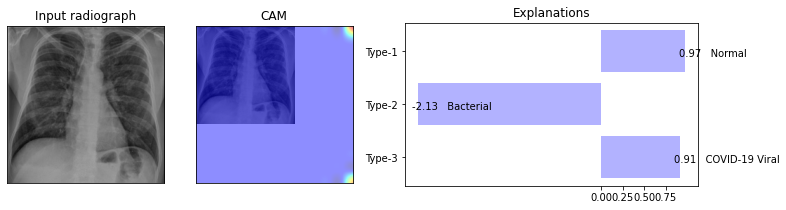

In [ ]:
decisionVisualization(img, xaiMethod=gradCAM, vizMethod='CAM')

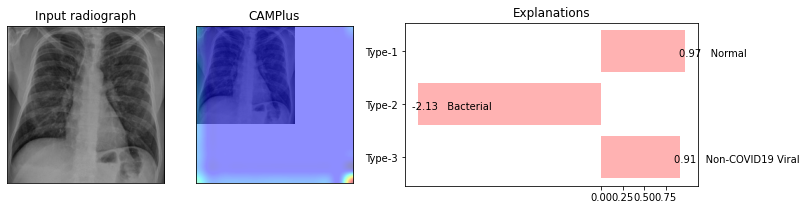

In [ ]:
decisionVisualization(img, xaiMethod=gradCAMPlus, vizMethod='CAMPlus')